<a href="https://colab.research.google.com/github/mfarucci/AdvancedDataAnalytics/blob/main/EDA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Google Advanced - Corso 3 modulo 2
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

#legge il file csv
df = pd.read_csv("number of strikes_new.csv")

#https://pandas.pydata.org/docs/reference/frame.html

#fornisce preview di x record: head(x)
df.head()

,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)


In [ ]:
#fornisce le info sulle colonne del df - identifica record NULL

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   date               1048575 non-null  object
 1   number_of_strikes  1048575 non-null  int64 
 2   center_point_geom  1048575 non-null  object
dtypes: int64(1), object(2)
memory usage: 24.0+ MB


In [ ]:
#fornisce una descrizione statistica dei campi numerici
df.describe()

,number_of_strikes
count,1.048575e+06
mean,2.726172e+01
std,5.452104e+01
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,3.900000e+01
max,2.211000e+03


In [ ]:
#fornisce tupla della forma del df

df.size

df.shape



(1048575, 3)

In [ ]:
#converte campo object in data
df['date'] = pd.to_datetime(df['date'])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   date               1048575 non-null  datetime64[ns]
 1   number_of_strikes  1048575 non-null  int64         
 2   center_point_geom  1048575 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 24.0+ MB


,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)


In [ ]:
#crea nuova colonna month e vi inserisce il mese
df['month'] = df['date'].dt.month
df.head()

,date,number_of_strikes,center_point_geom,month
0,2018-01-03,194,POINT(-75 27),1
1,2018-01-03,41,POINT(-78.4 29),1
2,2018-01-03,33,POINT(-73.9 27),1
3,2018-01-03,38,POINT(-73.8 27),1
4,2018-01-03,92,POINT(-79 28),1


In [ ]:
#converte il mese in versione testo estesa prendendo solo primi 3 caratteri con Python
df['month_txt'] = df['date'].dt.month_name().str.slice(stop=3)
df['year'] = df['date'].dt.strftime('%Y')
df.head()

,date,number_of_strikes,center_point_geom,month,month_txt,year
0,2018-01-03,194,POINT(-75 27),1,Jan,2018
1,2018-01-03,41,POINT(-78.4 29),1,Jan,2018
2,2018-01-03,33,POINT(-73.9 27),1,Jan,2018
3,2018-01-03,38,POINT(-73.8 27),1,Jan,2018
4,2018-01-03,92,POINT(-79 28),1,Jan,2018


In [ ]:
df_sub = df[['number_of_strikes','month', 'month_txt','year']]
df_sub.head()

,number_of_strikes,month,month_txt,year
0,194,1,Jan,2018
1,41,1,Jan,2018
2,33,1,Jan,2018
3,38,1,Jan,2018
4,92,1,Jan,2018


In [ ]:
df_by_month = df_sub.groupby(['month', 'month_txt', 'year']).sum().sort_values('month', ascending=True).sort_values('year', ascending=False).head(15).reset_index()
# seleziona solo anno 2018
#df_by_month = df_sub[df_sub['year'] == 2018].groupby(['month', 'month_txt', 'year']).sum().sort_values('month', ascending=True).head(15).reset_index()
#versione2
#df_2018 = df_sub[df_sub['year'] == 2018]
#df_by_month = df_2018.groupby(['month', 'month_txt', 'year']).sum().sort_values('month', ascending=True).head(15).reset_index()
df_by_month

,month,month_txt,year,number_of_strikes
0,9,Sep,2019,109
1,1,Jan,2018,619691
2,2,Feb,2018,1751617
3,3,Mar,2018,478382
4,4,Apr,2018,876613
5,5,May,2018,2339694
6,6,Jun,2018,4218344
7,7,Jul,2018,5073606
8,8,Aug,2018,11170101
9,9,Sep,2018,1384671


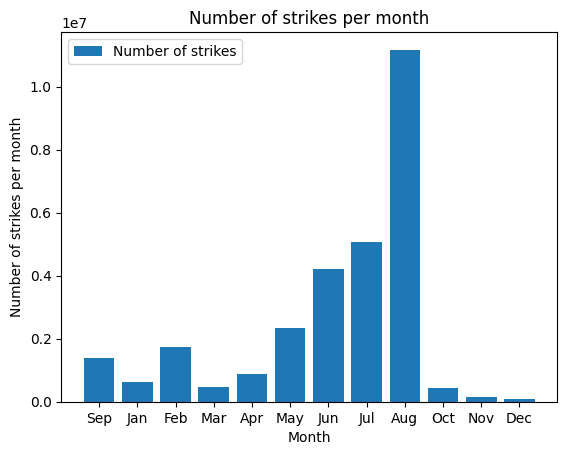

In [ ]:
plt.bar(x=df_by_month['month_txt'], height=df_by_month['number_of_strikes'], label="Number of strikes")
plt.title("Number of strikes per month")
plt.xlabel("Month")
plt.ylabel("Number of strikes per month")
plt.legend()
plt.show()

In [ ]:
#Crea vari campi data con estrazione di dati da Python
# https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

df['week'] = df['date'].dt.strftime('%Y-W%V')
df['month'] = df['date'].dt.strftime('%Y-%m')
df['quarter'] = df['date'].dt.to_period('Q').dt.strftime('%Y-Q%q')
#df['year'] = df['date'].dt.strftime('%Y')
df['day'] = df['date'].dt.strftime('%d')
df['full_date'] = df['date'].dt.strftime('%a %d %b %Y, %I:%M%p')
df.head()

In [ ]:
df_sub = df[['number_of_strikes','week', 'year']]
df_sub.head()
df_sub.info()
df_sub.shape